In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [2]:
features_df = pd.read_csv(
    'C:/Users/Gesa/Uni/Softwarepraktikum/Softwarepraktikum/features/ctd_nervous-system_20240223_scores.tsv', sep='\t')

ground_truth_df = pd.read_csv('C:/Users/Gesa/Uni/Softwarepraktikum/Softwarepraktikum/merged_nerveSys.tsv', sep='\t')

print(features_df.head())
print(ground_truth_df.head())

     drugA    drugB     sAB  opAB  meanspAB  medianspAB  minspAB  maxspAB  \
0  DB06709  DB08506  0.3427     0     0.615       0.630     0.46     0.74   
1  DB06709  DB02376  0.4188     0     0.685       0.685     0.56     0.81   
2  DB06709  DB04282  0.4188     0     0.685       0.685     0.56     0.81   
3  DB06709  DB04564  0.4188     0     0.685       0.685     0.56     0.81   
4  DB06709  DB04659  0.4188     0     0.685       0.685     0.56     0.81   

     zTDA    zTDB  ...  opAD  opBD  meanspAD  meanspBD  medianspAD  \
0  0.5751  1.4603  ...   3.0   0.0    0.6014    0.5850        0.59   
1  0.5751 -1.3073  ...   3.0   0.0    0.6014    0.6046        0.59   
2  0.5751 -1.3073  ...   3.0   0.0    0.6014    0.6046        0.59   
3  0.5751 -1.3073  ...   3.0   0.0    0.6014    0.6046        0.59   
4  0.5751 -1.3073  ...   3.0   0.0    0.6014    0.6046        0.59   

   medianspBD  minspAD  minspBD  maxspAD  maxspBD  
0        0.57      0.0     0.28     1.38     1.13  
1        0.5

In [3]:
merged_df = pd.merge(features_df, ground_truth_df, on=['drugA', 'drugB'])

merged_df.set_index(['drugA', 'drugB'], inplace=True)
print(merged_df)

                    sAB  opAB  meanspAB  medianspAB  minspAB  maxspAB    zTDA  \
drugA   drugB                                                                   
DB00001 DB01175  0.2975     0    0.6125       0.615     0.55     0.67 -0.8823   
        DB00721  0.3518     0    0.7025       0.605     0.48     1.12 -0.8823   
        DB00564  0.4200     0    0.4200       0.420     0.42     0.42 -0.8823   
        DB01367  0.3075     0    0.4967       0.640     0.20     0.65 -0.8823   
        DB00780  0.3698     0    0.5711       0.640     0.33     0.71 -0.8823   
...                 ...   ...       ...         ...      ...      ...     ...   
DB08918 DB09000  0.1055     0    0.5187       0.510     0.17     0.79 -1.9883   
DB08927 DB09000  0.5919     0    0.7585       0.740     0.64     0.91  0.9986   
DB08953 DB09000  0.3705     0    0.5362       0.500     0.43     0.69 -0.8864   
DB08954 DB09000 -0.0081     0    0.5165       0.530     0.18     0.81 -2.1913   
DB09000 DB09017  0.3391     

In [7]:
X = merged_df.drop(['adv/app','drugcomb','sA','sB','opA','opB'], axis=1)  # Annahme: 'adv/app' ist Ihre Zielvariable
Y = merged_df['adv/app']
print(X)

# Aufteilen des Datensatzes in Trainings-, Validierungs- und Testdaten
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

#Scaling features 
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

                    sAB  opAB  meanspAB  medianspAB  minspAB  maxspAB    zTDA  \
drugA   drugB                                                                   
DB00001 DB01175  0.2975     0    0.6125       0.615     0.55     0.67 -0.8823   
        DB00721  0.3518     0    0.7025       0.605     0.48     1.12 -0.8823   
        DB00564  0.4200     0    0.4200       0.420     0.42     0.42 -0.8823   
        DB01367  0.3075     0    0.4967       0.640     0.20     0.65 -0.8823   
        DB00780  0.3698     0    0.5711       0.640     0.33     0.71 -0.8823   
...                 ...   ...       ...         ...      ...      ...     ...   
DB08918 DB09000  0.1055     0    0.5187       0.510     0.17     0.79 -1.9883   
DB08927 DB09000  0.5919     0    0.7585       0.740     0.64     0.91  0.9986   
DB08953 DB09000  0.3705     0    0.5362       0.500     0.43     0.69 -0.8864   
DB08954 DB09000 -0.0081     0    0.5165       0.530     0.18     0.81 -2.1913   
DB09000 DB09017  0.3391     

Best k: 3 with validation accuracy: 1.00
Test accuracy with best k: 1.00


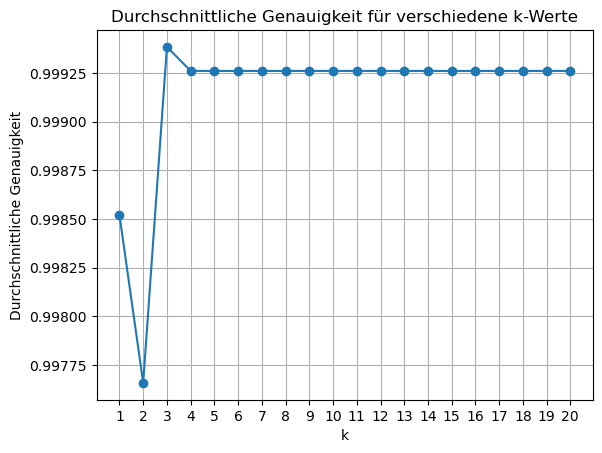

In [9]:
k_values = list(range(1, 21))  # Zum Beispiel von 1 bis 20

# Leere Liste zum Speichern der durchschnittlichen Genauigkeiten für jeden k-Wert
mean_accuracy = []

best_k = None
best_accuracy = 0

# Durchlaufen der k-Werte und Bewertung der Leistung auf dem Validierungsdatensatz
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)
    predictions = knn.predict(X_val_scaled)
    accuracy = accuracy_score(Y_val, predictions)
    mean_accuracy.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# Verwenden des besten k-Werts, um das endgültige Modell zu trainieren
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, Y_train)

# Bewertung der Leistung des endgültigen Modells auf dem Testdatensatz
test_predictions = final_knn.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test, test_predictions)

print(f"Best k: {best_k} with validation accuracy: {best_accuracy:.2f}")
print(f"Test accuracy with best k: {test_accuracy:.2f}")

plt.plot(k_values, mean_accuracy, marker='o')
plt.title('Durchschnittliche Genauigkeit für verschiedene k-Werte')
plt.xlabel('k')
plt.ylabel('Durchschnittliche Genauigkeit')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [10]:
# Erstellen Sie ein k-NN-Modell mit dem besten k-Wert
best_knn = KNeighborsClassifier(n_neighbors=best_k)

# Trainieren Sie das k-NN-Modell auf dem gesamten Trainingsdatensatz
best_knn.fit(X_train_scaled, Y_train)

# Verwenden Sie das trainierte Modell, um Vorhersagen auf dem Testdatensatz zu machen
predictions = best_knn.predict(X_test_scaled)

# Berechnen Sie die Genauigkeit des Modells auf dem Testdatensatz
accuracy = accuracy_score(Y_test, predictions)
print("Genauigkeit des k-NN-Modells auf dem Testdatensatz:", accuracy)
comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
mask = comparison['Actual'] != comparison['Predicted']
differences = comparison[mask]
#0.9991984215069676 k=5
#0.9991367616228881 k=13
print(differences)
print(len(differences))


Genauigkeit des k-NN-Modells auf dem Testdatensatz: 0.9991367616228881
                 Actual  Predicted
drugA   drugB                     
DB00201 DB00945       0          1
DB00318 DB00388       0          1
DB00945 DB06800       1          0
DB00316 DB00852       0          1
DB00668 DB00750       0          1
DB00318 DB06691       0          1
DB01404 DB01381       0          1
7


In [11]:
report=classification_report(Y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.25      0.36         8
           1       1.00      1.00      1.00      8101

    accuracy                           1.00      8109
   macro avg       0.83      0.62      0.68      8109
weighted avg       1.00      1.00      1.00      8109
